In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import json
from pyecharts.charts import Pie
from pyecharts import options as opts

In [2]:
base_path = './data/'

In [3]:
def build_mashup_apis():
    with open(base_path + 'split_nodes.csv', 'r', encoding='utf-8') as file:
        splits_c = pd.read_csv(file, encoding='utf-8')

    with open(base_path + 'm-a_edges.csv', 'r', encoding='utf-8') as file:
        edges = pd.read_csv(file, encoding='utf-8')

    with open(base_path + 'split_nodes.csv', 'r', encoding='utf-8') as file:
        split_ndoes = pd.read_csv(file, encoding='utf-8')

    with open(base_path + 'tranfer_nodes.csv', 'r', encoding='utf-8') as file:
        trans_nodes = pd.read_csv(file, encoding='utf-8')

    with open(base_path + 'api_nodes_estimator.csv', 'r', encoding='utf-8') as file:
        apis_c = pd.read_csv(file, encoding='utf-8', parse_dates=['st', 'et', 'oet'])
    apis_c = apis_c.rename(columns={'url': 'a_url', 'name': 'a_name', 'st': 'a_st', 'et': 'a_et', 'oet': 'a_oet', 'c': 'a_c', 'oac': 'a_oac', 'ac': 'a_ac'})

    with open(base_path + 'mashup_nodes_estimator2.csv', 'r', encoding='utf-8') as file:
        mashups_c = pd.read_csv(file, encoding='utf-8', parse_dates=['st', 'et', 'oet'])
        # mashups_c = mashups_c[mashups_c['tp'] == 'mashup']    # 这个版本的文件有问题，所以不要用这个去筛选
        mashups_c = mashups_c[mashups_c['oac'] == True]

    mashups_api = pd.merge(mashups_c, edges, how='left', left_on='name', right_on='source')
    # 删除source列，因为跟name是一样的
    mashups_api = mashups_api.drop(columns=['source'])
    # 更名
    mashups_api = mashups_api.rename(columns={'target': 'ra'})    # related api

    mashups_api = pd.merge(mashups_api, split_ndoes, how='left', left_on='ra', right_on='source')
    mashups_api = mashups_api.drop(columns=['source'])
    mashups_api = mashups_api.rename(columns={'target': 'sta'})    # split target api

    mashups_api = pd.merge(mashups_api, trans_nodes, how='left', left_on='ra', right_on='source')
    mashups_api = mashups_api.drop(columns=['source'])
    mashups_api = mashups_api.rename(columns={'target': 'tta'})    # transfer target api
    # 将API的详细信息连接进去
    mashups_api = pd.merge(mashups_api, apis_c, how='left', left_on='ra', right_on='a_url')
    mashups_api = mashups_api.drop(columns=['a_url'])

    return mashups_api



In [4]:
mashups_api = build_mashup_apis()
# 确保所有都是oac=True的 Mashup
print(len(mashups_api))
mashups_api = mashups_api[mashups_api['oac'] == True]   # 筛选出PW上标记为活的mashup
print(len(mashups_api))

43
                   source                              target
0  /api/google-app-engine        /api/google-app-engine-admin
1  /api/google-app-engine   /api/google-app-engine-task-queue
2  /api/google-app-engine  /api/google-cloud-app-engine-tasks
3  /api/google-app-engine    /api/google-app-engine-admin-rpc
4        /api/google-maps             /api/google-static-maps
12614
                                              source  \
0                                Mashup: CouponRoots   
1                            Mashup: Raise the Money   
2                             Mashup: AnythingToHTML   
3                                Mashup: Velocipedia   
4  Mashup: Api Expert - MyMemory Language Translator   

                                  target  
0                            /api/coupon  
1                     /api/nationbuilder  
2  /api/hpe-haven-ondemand-view-document  
3                            /api/mapbox  
4                          /api/mymemory  
43
                   so

In [14]:
# how many mashups are there
mashups_api.groupby('name').count()
# output says 6247

,tp_x,url,st,et,oet,c,oac,ac,ra,sta,tta,tp_y,a_name,a_st,a_et,a_oet,a_c,a_oac,a_ac
name,,,,,,,,,,,,,,,,,,,
Mashup: #API Christmas,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1
Mashup: #Ask4Stuff: WorldCat Twitter Search,4,4,4,4,4,4,4,4,4,3,0,4,4,4,4,4,4,4,4
"Mashup: #BeerMap - The Top 2,500 Beers on Twitter",14,14,14,14,14,14,14,14,14,13,0,14,14,14,14,14,14,14,14
Mashup: #LinS Stats on Your LinkedIn Social Graph,2,2,2,2,2,2,2,2,2,0,0,2,2,2,2,2,2,2,2
Mashup: #S42AT,9,9,9,9,9,9,9,9,9,7,0,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mashup: youbeQ - Maps with Life,14,14,14,14,14,14,14,14,14,10,0,14,14,14,14,14,14,14,14
Mashup: youniversus,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1
Mashup: youwerecute,10,10,10,10,10,10,10,10,10,10,0,10,10,10,10,10,10,10,10


In [ ]:
# 修改原数据，只保留年份
mashups_api['st'] = mashups_api['st'].dt.year
mashups_api['et'] = mashups_api['et'].dt.year
mashups_api['oet'] = mashups_api['oet'].dt.year

In [5]:
dd = 'death'
ss = 'split'
tt = 'transfer'

In [15]:
def count_apis(by_ours=False):
    split_apis = set()
    transfer_apis = set()
    all_dead_apis = set()
    all_apis = set()
    # marked_dead_apis = set()
    for index, row in mashups_api.iterrows():
        api_name = row['ra']
        all_apis.add(api_name)
        # programmableweb 上标注为死亡的API

        # 使用oac 和 ac会产生不同的统计结果
        if by_ours:
            # 用a_ac判断
            if not row['a_ac']:
                all_dead_apis.add(api_name)
            if not pd.isna(row['sta']):
                all_dead_apis.add(api_name)
                split_apis.add(api_name)
            if not pd.isna(row['tta']):
                all_dead_apis.add(api_name)
                transfer_apis.add(api_name)
        else:
            # 用a_oac判断
            if not row['a_oac']:
                all_dead_apis.add(api_name)
            if not pd.isna(row['sta']):
                all_dead_apis.add(api_name)
                split_apis.add(api_name)
            if not pd.isna(row['tta']):
                all_dead_apis.add(api_name)
                transfer_apis.add(api_name)

    death_apis = all_dead_apis - (split_apis | transfer_apis)

    print(len(all_dead_apis), len(split_apis), len(transfer_apis), len(death_apis))
    # all_apis = list(all_apis)
    return death_apis, split_apis, transfer_apis


In [16]:
death_apis, split_apis, transfer_apis = count_apis()

316 5 4 307


In [19]:
# 根据年份获取这一年使用了split的mashup的名字列表
# 9.23 修正：因为Mashup 的死亡日期是估算出来的，因此不再使用死亡日期作判断依据
def get_count_by_year(year, type_ = None):
    """
        例如传入2020, ['death']，会返回截止至2020年底，已发布的mashup中，仅仅使用了death类型API的。
        例如传入2020, ['death', 'split']，会返回截止至2020年底，已发布的mashup中，仅仅是用了death 和 split类型的API
    """
    if type_ is None:
	    type_ = []
    mashups = set()         # 只要用了死亡的API就加入
    use_split = set()       # 只要用了split的API就加入
    use_transfer = set()    # 只要用了transfer的API就加入
    use_death = set()       # 只要用了death的API就加入

    for index, row in mashups_api.iterrows():
        name = row['name']
        api_name = row['ra']
        st = row['st'].year      # 发布日期
        # et = row['et'].year      # 死亡日期

        if st <= year:     # 发布日期小于这一年且死亡日期大于这一年
            if api_name in split_apis:
                use_split.add(name)
                mashups.add(name)

            if api_name in transfer_apis:
                use_transfer.add(name)
                mashups.add(name)


            if api_name in death_apis:
                use_death.add(name)
                mashups.add(name)

    all_used = use_death & use_split & use_transfer & mashups

    if len(type_) == 3:
        mashups = all_used
    elif len(type_) == 2:
        # 两个及以上
        if dd in type_:
            mashups = mashups & use_death
        if ss in type_:
            mashups = mashups & use_split
        if tt in type_:
            mashups = mashups & use_transfer

        mashups = mashups - all_used
    else:
        # 仅一个
        if dd in type_:
            mashups = use_death - use_split - use_transfer
        elif ss in type_:
            mashups = use_split - use_death - use_transfer
        elif tt in type_:
            mashups = use_transfer - use_death - use_split

    return list(mashups)

In [ ]:
# test
use_split_mashups_2017 = get_count_by_year(2020, ['death', 'split'])
len(use_split_mashups_2017)

## 统计如下

### 依据PW oac

In [20]:
labels = ['Death', 'Split', 'Transfer', 'Death+Split', 'Split+Transfer', 'Transfer+Death', 'Death+Split+Transfer']
death = get_count_by_year(2020, [dd])
split = get_count_by_year(2020, [ss])
transfer = get_count_by_year(2020, [tt])
death_split = get_count_by_year(2020, [dd, ss])
split_transfer = get_count_by_year(2020, [tt, ss])
transfer_death = get_count_by_year(2020, [tt, dd])
death_split_transfer = get_count_by_year(2020, [tt, ss, dd])
lens = [len(death), len(split), len(transfer) ,len(death_split), len(split_transfer), len(transfer_death), len(death_split_transfer)]
lens

[965, 2147, 57, 501, 25, 35, 41]

#### 绘图

In [21]:
pie = Pie()
count = [len(death), len(split), len(transfer) ,len(death_split), len(split_transfer), len(transfer_death), len(death_split_transfer)]

# 修改数据格式
pie_data = []
for i in range(len(count)):
    pie_data.append((labels[i], count[i]))

pie.add(' ', pie_data, center=['50%', '60%'])
pie.set_series_opts(label_opts=opts.LabelOpts(
                                                position="outside",
                                                formatter="{a|{a}}{abg|}\n{hr|}\n {b|{b}: }{c}  {per|{d}%}  ",
                                                background_color="#eee",
                                                border_color="#aaa",
                                                border_width=1,
                                                border_radius=4,
                                                rich={
                                                    "a": {"color": "#999", "lineHeight": 22, "align": "center"},
                                                    "abg": {
                                                        "backgroundColor": "#e3e3e3",
                                                        "width": "100%",
                                                        "align": "right",
                                                        "height": 22,
                                                        "borderRadius": [4, 4, 0, 0],
                                                    },
                                                    "hr": {
                                                        "borderColor": "#aaa",
                                                        "width": "100%",
                                                        "borderWidth": 0.5,
                                                        "height": 0,
                                                    },
                                                    "b": {"fontSize": 16, "lineHeight": 33},
                                                    "per": {
                                                        "color": "#eee",
                                                        "backgroundColor": "#334455",
                                                        "padding": [2, 4],
                                                        "borderRadius": 2,
                                                    },
                                                },
                                            ),
                                        )
pie.render('mashups_dead_api_usage_oac.html')


c:\users\zyq\appdata\local\programs\python\python38\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\zyq\\iCloudDrive\\Projects\\mashuppies\\mashups_dead_api_usage_oac.html'

### 依据我们访问的结果ac

In [24]:
death_apis, split_apis, transfer_apis = count_apis(by_ours=True)
labels = ['Death', 'Split', 'Transfer', 'Death+Split', 'Split+Transfer', 'Transfer+Death', 'Death+Split+Transfer']
death = get_count_by_year(2020, [dd])
split = get_count_by_year(2020, [ss])
transfer = get_count_by_year(2020, [tt])
death_split = get_count_by_year(2020, [dd, ss])
split_transfer = get_count_by_year(2020, [tt, ss])
transfer_death = get_count_by_year(2020, [tt, dd])
death_split_transfer = get_count_by_year(2020, [tt, ss, dd])
lens = [len(death), len(split), len(transfer) ,len(death_split), len(split_transfer), len(transfer_death), len(death_split_transfer)]
lens

c:\users\zyq\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1186 5 4 1177


[2476, 1549, 39, 1099, 11, 53, 55]

#### 绘图

In [25]:
pie = Pie()
count = [len(death), len(split), len(transfer) ,len(death_split), len(split_transfer), len(transfer_death), len(death_split_transfer)]

# 修改数据格式
pie_data = []
for i in range(len(count)):
    pie_data.append((labels[i], count[i]))

pie.add(' ', pie_data, center=['50%', '60%'])
pie.set_series_opts(label_opts=opts.LabelOpts(
                                                position="outside",
                                                formatter="{a|{a}}{abg|}\n{hr|}\n {b|{b}: }{c}  {per|{d}%}  ",
                                                background_color="#eee",
                                                border_color="#aaa",
                                                border_width=1,
                                                border_radius=4,
                                                rich={
                                                    "a": {"color": "#999", "lineHeight": 22, "align": "center"},
                                                    "abg": {
                                                        "backgroundColor": "#e3e3e3",
                                                        "width": "100%",
                                                        "align": "right",
                                                        "height": 22,
                                                        "borderRadius": [4, 4, 0, 0],
                                                    },
                                                    "hr": {
                                                        "borderColor": "#aaa",
                                                        "width": "100%",
                                                        "borderWidth": 0.5,
                                                        "height": 0,
                                                    },
                                                    "b": {"fontSize": 16, "lineHeight": 33},
                                                    "per": {
                                                        "color": "#eee",
                                                        "backgroundColor": "#334455",
                                                        "padding": [2, 4],
                                                        "borderRadius": 2,
                                                    },
                                                },
                                            ),
                                        )
pie.render('mashups-dead_api_usage_ac.html')


c:\users\zyq\appdata\local\programs\python\python38\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\zyq\\iCloudDrive\\Projects\\mashuppies\\mashups-dead_api_usage_ac.html'

# 按年统计mashup使用api的数量

In [20]:
with open('graph_data_backup/data0906-1.txt', 'r', encoding='utf-8') as file:
    active_mashups = json.load(file)
    active_mashups = [a for a in active_mashups if a is not None]

with open('graph_data_backup/deadpool_mashups0917.txt', 'r', encoding='utf-8') as file:
    dead_mashups = json.load(file)
    dead_mashups = [d for d in dead_mashups if d is not None]

all_mashups = active_mashups + dead_mashups
len(all_mashups)


7947

In [43]:
# 可删
count_dict = {}
# for am in all_mashups:
#     ra = am['related_apis']
#     length = len(ra)
#     if length in count_dict:
#         count_dict[length].append(am['title'] + am['date'])
#     else:
#         count_dict[length] = [am['title'] + am['date']]

for name, group in mashups_api[['name', 'st', 'et', 'oet', 'ra']].groupby('name'):
    length = len(group.groupby('ra'))
    if length in count_dict:
        count_dict[length].append(name + str(group.iloc[[0], [1]].values[0][0]))
    else:
        count_dict[length] = [name + str(group.iloc[[0], [1]].values[0][0])]


print('(API数量, 出现次数)')
# for key in sorted(count_dict.keys()):
#     if len(count_dict[key]) >= 20:
#         print((key, count_dict[key]))
[(key, count_dict[key]) for key in sorted(count_dict.keys()) if key >= 20]

(API数量, 出现次数)


[(20, ['Mashup: G4ng2010', "Mashup: What's Public2011"]),
 (21,
  ['Mashup: ConnectorLocal2009',
   'Mashup: ShipStation2012',
   'Mashup: coderbits2013']),
 (22, ['Mashup: vplan.com/search2013']),
 (23, ['Mashup: Gawkk.com2008']),
 (24, ['Mashup: Sociotoco Search2009']),
 (28, ['Mashup: Pixelpipe2008']),
 (29, ['Mashup: DoAt (do@)2011']),
 (37, ['Mashup: We-Wired Web2012'])]

In [33]:
count_dict[36], count_dict[37],count_dict[63]

(['Mashup: Headup02.05.2009'],
 ['Mashup: We-Wired Web06.14.2012\n'],
 ['Mashup: Tagbulb12.02.2006'])

In [16]:
import datetime
date_dict = {}
# 利用他们的名字构造一个时间dict
for m in all_mashups:
    name = m['title']
    st = datetime.datetime.strptime(m['date'].strip(), '%m.%d.%Y').date()
    date_dict[name] = st

len(date_dict)

NameError: name 'all_mashups' is not defined

## 统计历年mashup平均使用api的数量

In [13]:
def init_dict():
    api_count = {
        yy: 0 for yy in range(2005, 2021)
    }

    mashup_count = {
        yy: 0 for yy in range(2005, 2021)
    }

    return api_count, mashup_count

### 平均值，折线图

In [7]:
from matplotlib import pyplot as plt

### 箱形图

In [6]:
api_usage = {
    x: [] for x in range(2005, 2021)
}

# for am in all_mashups:
#     year = am['date'].strip().split('.')[2]
#     api_usage[int(year)].append(len(am['related_apis']))

for name, group in mashups_api[['name', 'st', 'et', 'oet', 'ra']].groupby('name'):
    year = int(group.iloc[[0], [1]].values[0][0])
    api_usage[year].append(len(group.groupby('ra')))

boxes = [usage for usage in api_usage.values()]

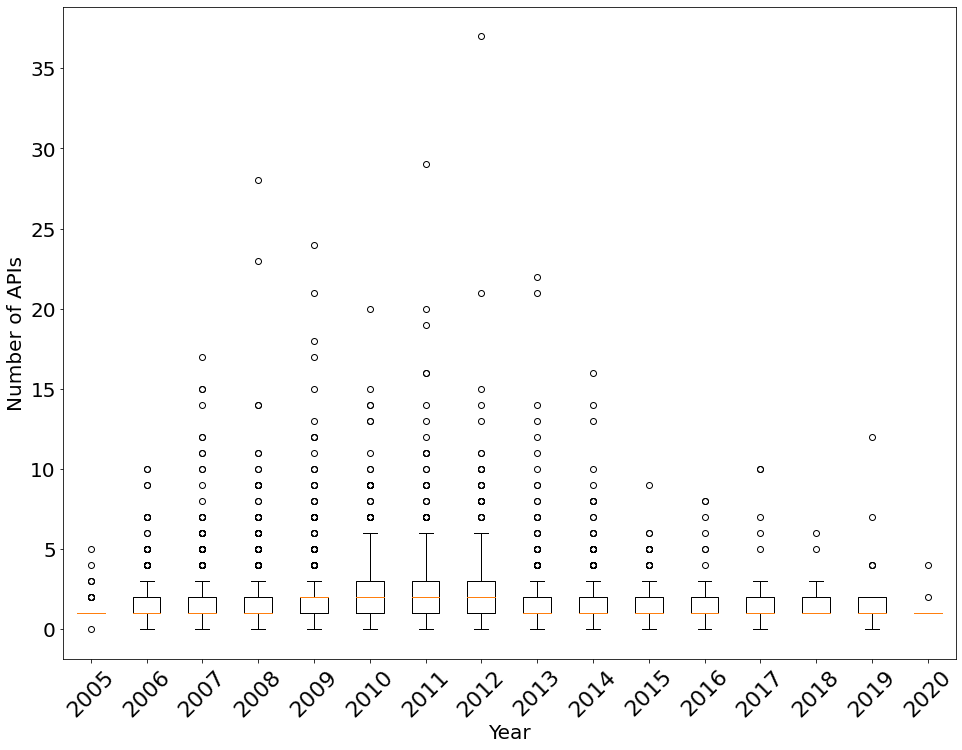

In [11]:
plt.figure(figsize=(16, 12))
plt.xticks(fontsize=22, rotation=45)
plt.yticks(fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of APIs', fontsize=20)
plt.boxplot(boxes, labels=api_usage.keys())
plt.savefig('mashup_complexity_newly_submit.png', dpi=150)

In [ ]:
## 统计历年新提交的mashup使用api数量的变化（改成箱型图）

In [5]:
mashups_api['st'] = mashups_api['st'].dt.year

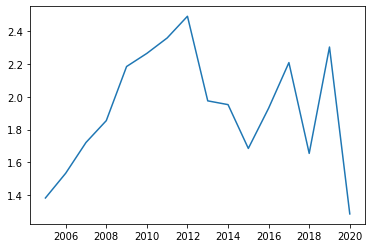

<Figure size 432x288 with 0 Axes>

In [33]:
st_mashup_api_count, mashup_count = init_dict()
# st_mashup_api_count = {
#     k: [] for k in range(2005, 2021)
# }

# 现在把year取出来，然后用year为索引
for name, group in mashups_api[['name', 'st', 'et', 'oet', 'ra']].groupby('name'):
    # print(group)
    st = int(group.iloc[[0], [1]].values[0][0])
    mashup_count[st] += 1
    count = len(group.groupby('ra'))
    # api_count[et] += count
    st_mashup_api_count[st] += count

# boxes = [usage for usage in st_mashup_api_count.values()]
# plt.figure(figsize=(14, 8))
# plt.xlabel('Year')
# plt.ylabel('Number of APIs (Submit)')
# plt.boxplot(boxes, labels=st_mashup_api_count.keys())

y3 = []
for k in mashup_count.keys():
    if st_mashup_api_count[k] != 0:
        y3.append(st_mashup_api_count[k] / float(mashup_count[k]))
    else:
        y3.append(0)
# y2 = [et_mashup_api_count[k] / float(mashup_count[k]) for k in mashup_count.keys()]
x = [i for i in mashup_count.keys()]
plt.plot(x, y3)
plt.show()
plt.savefig('et.png', dpi=500)

In [36]:
min(y3), max(y3)

(1.2857142857142858, 2.492248062015504)

## 统计历年死亡mashup使用的api的数量变化（et决定）

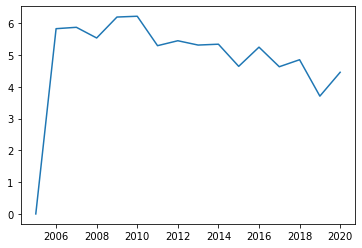

<Figure size 432x288 with 0 Axes>

In [17]:
et_mashup_api_count, mashup_count = init_dict()

# 现在把year取出来，然后用year为索引，将len(group)和1分别相加到上面的dict中
for name, group in mashups_api[['name', 'st', 'et', 'oet', 'ra']].groupby('name'):
    et = int(group.iloc[[0], [2]].values[0][0])
    if et != 2222:
       mashup_count[et] += 1
       count = len(group.groupby('ra'))
       api_count[et] += count
       et_mashup_api_count[et] += count

y2 = []
for k in mashup_count.keys():
    if et_mashup_api_count[k] != 0:
        y2.append(et_mashup_api_count[k] / float(mashup_count[k]))
    else:
        y2.append(0)
# y2 = [et_mashup_api_count[k] / float(mashup_count[k]) for k in mashup_count.keys()]

plt.plot(x, y2)
plt.show()
plt.savefig('et.png', dpi=500)

## 统计历年死亡mashup使用的api的数量变化（oet决定）

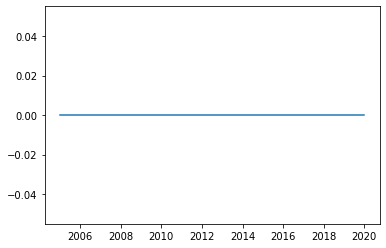

<Figure size 432x288 with 0 Axes>

In [18]:
oet_mashup_api_count, mashup_count = init_dict()

for name, group in mashups_api[['name', 'st', 'et', 'oet', 'ra']].groupby('name'):
    oet = int(group.iloc[[0], [3]].values[0][0])
    if oet != 2222:
       mashup_count[oet] += 1
       count = len(group)
       api_count[oet] += count
       oet_mashup_api_count[oet] += count

y3 = []
for k in mashup_count.keys():
    if oet_mashup_api_count[k] != 0:
        y3.append(oet_mashup_api_count[k] / float(mashup_count[k]))
    else:
        y3.append(0)

# y3 = [oet_mashup_api_count[k] / float(mashup_count[k]) for k in mashup_count.keys()]

plt.plot(x, y3)
plt.show()
plt.savefig('oet.png', dpi=500)

## 读取死亡mashup的源文件（json），观察mashup使用api数量的变化

为什么这么做：
- 因为csv格式化文件里面的oet好像有问题，导致我无法统计处正确信息，所以读一下源文件看看

In [14]:
oet_mashup_api_count, mashup_count = init_dict()

# 用上面读过的dead_mashups做一次统计
for dm in dead_mashups:
    oet = int('20' + dm['deprecated_date_estimated'].split(' ')[0].split('-')[2])
    ras = dm['related_apis']
    oet_mashup_api_count[oet] += len(ras)
    mashup_count[oet] += 1

x = [k for k in mashup_count.keys()]
y3 = []
for k in mashup_count.keys():
    if oet_mashup_api_count[k] != 0:
        y3.append(oet_mashup_api_count[k] / float(mashup_count[k]))
    else:
        y3.append(0)

plt.plot(x, y3)
plt.show()
plt.savefig('oet.png', dpi=500)

NameError: name 'dead_mashups' is not defined

- 下面做两个统计：
    1. 统计死亡的mashup的api用量，绘制箱形图
    2. 统计活着的mashup的api用量，绘制箱形图

    **需要累积**

In [14]:
api_usage_a = {
    x: [] for x in range(2005, 2021)
}

api_usage_d = {
    x: [] for x in range(2005, 2021)
}

mashup_count_a, mashup_count_d = init_dict()

for name, group in mashups_api[['name', 'st', 'et', 'oet', 'ra', 'ac']].groupby('name'):
    year = int(group.iloc[[0], [1]].values[0][0])
    et = int(group.iloc[[0], [2]].values[0][0])
    et = min(2020, et)
    ac = bool(group.iloc[[0], [5]].values[0][0])
    if True:

        for y in range(year, et + 1):
            api_usage_a[y].append(len(group.groupby('ra')))
            mashup_count_a[y] += 1

        # api_usage_a[year].append(len(group.groupby('ra')))
        # mashup_count_a[year] += 1
    else:
        # 这一段暂时不写了，也要写成if为true时里面的样子才是正确的
        api_usage_d[year].append(len(group.groupby('ra')))
        mashup_count_d[year] += 1


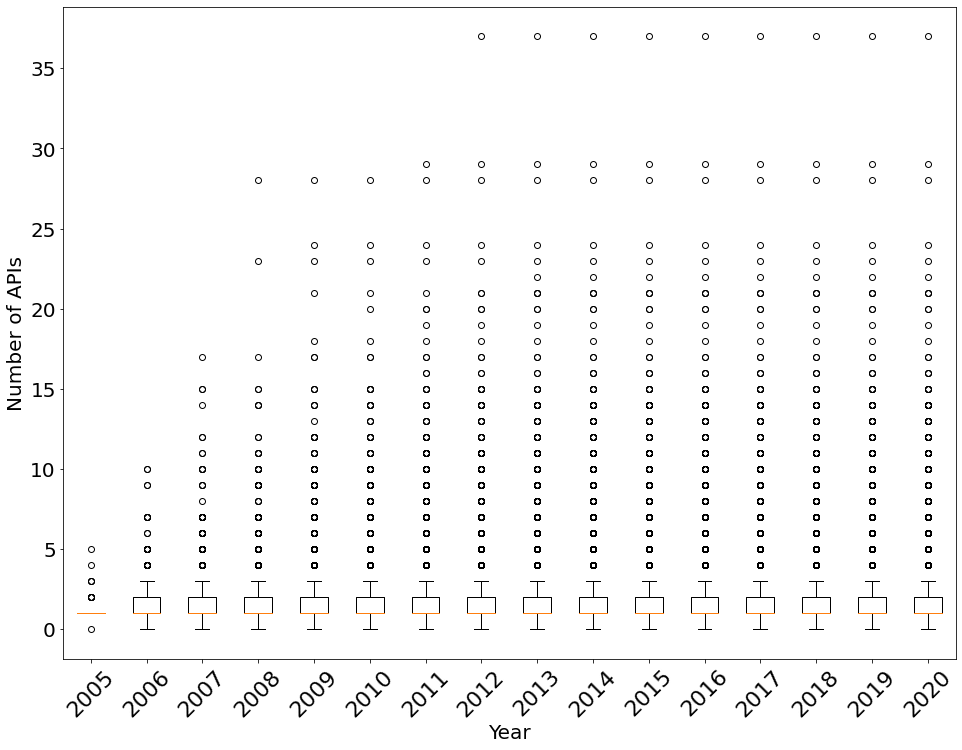

In [15]:
# ac == True
boxes = [usage for usage in api_usage_a.values()]
plt.figure(figsize=(16, 12))
plt.xticks(fontsize=22, rotation=45)
plt.yticks(fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of APIs', fontsize=20)
plt.boxplot(boxes, labels=api_usage_a.keys())
plt.savefig('mashup_complexity_overall.png', dpi=150)

In [ ]:
# ac == False
boxes = [usage for usage in api_usage_d.values()]
plt.figure(figsize=(14, 8))
plt.xlabel('Year')
plt.ylabel('Number of APIs (Deactivated)')
plt.boxplot(boxes, labels=api_usage_d.keys())

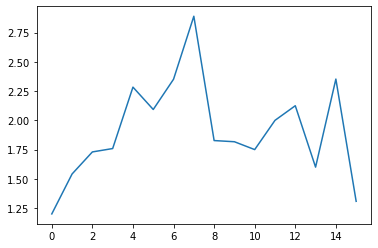

In [15]:
# 如果绘制平均值的折线图？
# active
y = [sum(api_usage_a[key]) / float(mashup_count_a[key]) for key in mashup_count_a]
plt.plot(y)

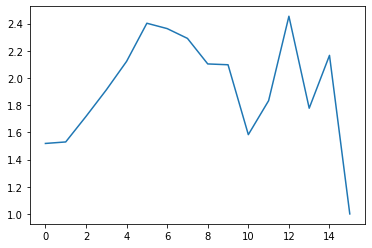

In [16]:
# dead
y = [sum(api_usage_d[key]) / float(mashup_count_d[key]) for key in mashup_count_d]
plt.plot(y)